## Importing python libraries

In [135]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import requests
import sqlite3
import matplotlib.pyplot as plt

## Scrapping data

### 1.  requesting a url and getting the page content

In [136]:
def url_request(url):
    page = requests.get(url).content
    soup = bs(page,'lxml')
    return soup

soup = url_request('https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area')

### 2. Cleaning up the  page content to get desired data: Country's  name and area

In [137]:
my_table = soup.find('table', class_= "wikitable sortable")
rows = my_table.find_all('tr')
country_area_map = {}
for _rowNum in range(len(rows)-2):
    rowNum = _rowNum + 1
    row_columns = rows[rowNum].find_all('td')
    country_name = row_columns[1].find_all('a')[0]['title']
    area = row_columns[2].contents[0]
    country_area_map[country_name] = area
    
geo_df = pd.DataFrame(country_area_map.items(), columns=['Country', 'Area'])

In [138]:
def clean(x):
    y = x[:-1]
    y = y.replace(",", "")
    return int(y)

geo_df['Area'] = geo_df['Area'].apply(clean)

# Persisting dataframe to sqlite

In [139]:
conn = sqlite3.connect('geography.sqlite')
geo_df.to_sql('area', conn, index=False, if_exists='replace')
conn.close()

# Querying db - countries with area > 100,000

In [140]:
#read from sqlite database and perform query
conn = sqlite3.connect('geography.sqlite')
query = """
    SELECT 
        country, area
    FROM area 
    WHERE area > "100000" """

In [141]:
result = pd.read_sql_query(query, conn).head()

In [142]:
result

,Country,Area
0,Russia,13000000
1,China,9596961
2,India,3287263
3,Kazakhstan,2544900
4,Saudi Arabia,2149690


### Scatter Chart 

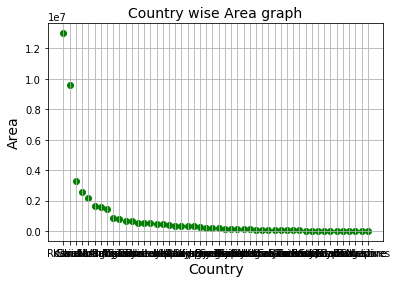

In [153]:
plt.scatter(geo_df['Country'], geo_df['Area'], color='green')
plt.title('Country wise Area graph', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Area', fontsize=14)
plt.grid(True)
plt.show()

### Pie Chart

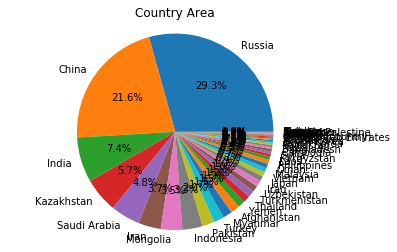

In [151]:
plt.pie(geo_df['Area'], labels= geo_df['Country'],autopct='%1.1f%%')
plt.title('Country Area')
plt.axis('equal')
plt.show()